In [1]:
# NOT SGD

%load_ext autoreload
%autoreload 2

In [2]:
from collections import defaultdict
from neuralNet import * 
from circularData import *
from generateTrainData import * 
from plotTrajectories import *
import random
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import crocoddyl
crocoddyl.switchToNumpyArray()



Using TensorFlow backend.


In [3]:
# get the training set
df = getTrainingData(11000)
trajectory_dataset_ = df.values

(11000, 94)


In [26]:
# Preprocess the damn set
trajectory_scaler = StandardScaler()
trajectory_dataset = trajectory_scaler.fit_transform(trajectory_dataset_)

In [27]:
# with trajectory DATASET
x_train , y_train = trajectory_dataset[0:10000,0:3], trajectory_dataset[0:10000, 3:]
print("TRAIN ",x_train.shape,",", y_train.shape)

x_test , y_test = trajectory_dataset[10000:,0:3], trajectory_dataset[10000:, 3:]
print("TEST ", x_test.shape,",", y_test.shape)

TRAIN  (10000, 3) , (10000, 91)
TEST  (1000, 3) , (1000, 91)


In [28]:
net = kerasBaselineNet(x_train,
                       y_train,
                       x_test,
                       y_test,
                       NUNITS_INPUT = 128,
                       NUNITS = 64,
                       NHIDDEN = 2,
                       lr = 1e-3,
                       EPOCHS = 100,
                       BATCHSIZE = 64,
                       VERBOSE = 1,
                       saveModel = False,
                       name = "baseline")

Epoch 1/100
10000/10000 [==============================] - 1s 50us/step - loss: 0.4965 - mean_squared_error: 0.4965 - mean_absolute_error: 0.5082
Epoch 2/100
10000/10000 [==============================] - 0s 39us/step - loss: 0.2258 - mean_squared_error: 0.2258 - mean_absolute_error: 0.3072
Epoch 3/100
10000/10000 [==============================] - 0s 40us/step - loss: 0.1140 - mean_squared_error: 0.1140 - mean_absolute_error: 0.2099
Epoch 4/100
10000/10000 [==============================] - 0s 39us/step - loss: 0.0798 - mean_squared_error: 0.0798 - mean_absolute_error: 0.1700
Epoch 5/100
10000/10000 [==============================] - 0s 39us/step - loss: 0.0656 - mean_squared_error: 0.0656 - mean_absolute_error: 0.1506
Epoch 6/100
10000/10000 [==============================] - 0s 40us/step - loss: 0.0568 - mean_squared_error: 0.0568 - mean_absolute_error: 0.1349
Epoch 7/100
10000/10000 [==============================] - 0s 40us/step - loss: 0.0482 - mean_squared_error: 0.0482 - mean_a

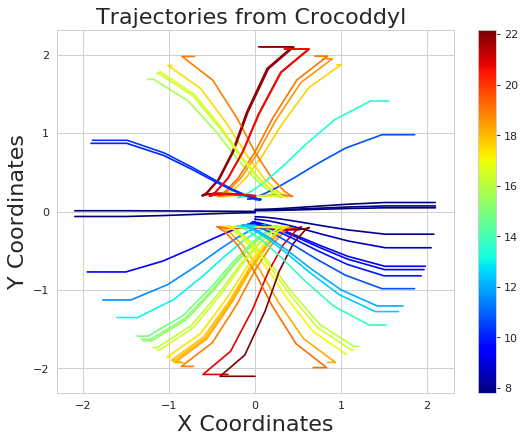

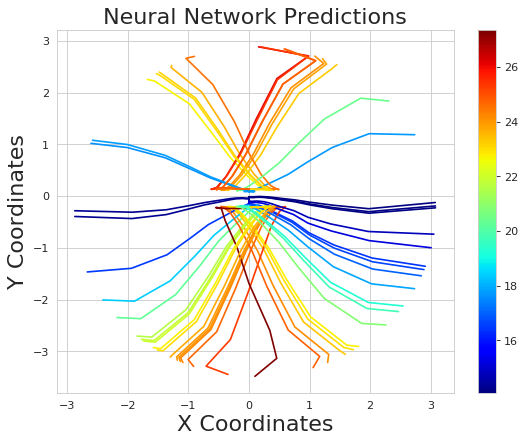

In [29]:
test = testData()
cost_crocoddyl = defaultdict()
for row in test:
    key = row[-1]
    row_ = row[:-1]
    row_ = np.array(row_).reshape(31,3)
    cost_crocoddyl[key] = np.asarray(row_)
    
    
test_dataset_ = test
test_dataset = trajectory_scaler.fit_transform(test_dataset_)
test_dataset = test_dataset_
x_test_ , y_test_ = test_dataset[:,0:3], test_dataset[:, 3:]

y_predicted = net.predict_on_batch(x_test_)

predictions = np.hstack((x_test_, y_predicted))

results = trajectory_scaler.inverse_transform(predictions)

cost_net = defaultdict()
for row in results:
    key = row[-1]
    row_ = row[:-1]
    row_ = np.array(row_).reshape(31,3)
    cost_net[key] = np.asarray(row_)    
    
plotTrajectories(cost_crocoddyl, True)
plotTrajectories(cost_net, False)
        